In [1]:
import time
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
train_data = pd.read_csv("train_signatures_scaled_with_labels.csv").values
test_data = pd.read_csv("test_signatures_scaled_with_labels.csv").values

In [3]:
train_data.shape

(59999, 1023)

In [4]:
test_data.shape

(9999, 1023)

In [5]:
# Separate the labels (first column) from the path signatures (remaining columns)
# First column is labels
train_labels = train_data[:, 0] # First column is labels
test_labels = test_data[:, 0]
# Remaining columns are features
train_signatures = train_data[:, 1:] # Remaining columns are features
test_signatures = test_data[:, 1:] # Remaining columns are features

In [6]:
# Train the model
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=300, random_state=42)
mlp.fit(train_signatures, train_labels)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

Training Time: 5292.57 seconds


In [7]:
# Make predictions 
predictions = mlp.predict(test_signatures)

In [8]:
# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print("\nClassification Report:")
print(classification_report(test_labels, predictions))
print("\nConfusion Matrix:")
cm = confusion_matrix(test_labels, predictions)
print(cm)

Accuracy: 0.9386
Training Time: 5292.57 seconds

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       980
         1.0       0.98      0.97      0.97      1135
         2.0       0.95      0.95      0.95      1032
         3.0       0.94      0.95      0.94      1010
         4.0       0.89      0.92      0.91       982
         5.0       0.96      0.93      0.95       892
         6.0       0.98      0.96      0.97       958
         7.0       0.88      0.91      0.89      1027
         8.0       0.93      0.92      0.92       974
         9.0       0.93      0.89      0.91      1009

    accuracy                           0.94      9999
   macro avg       0.94      0.94      0.94      9999
weighted avg       0.94      0.94      0.94      9999


Confusion Matrix:
[[ 962    1    4    1    1    0    4    1    4    2]
 [   0 1098    6    0    5    2    3    8   12    1]
 [   2    8  985    8    0    2    0   15   

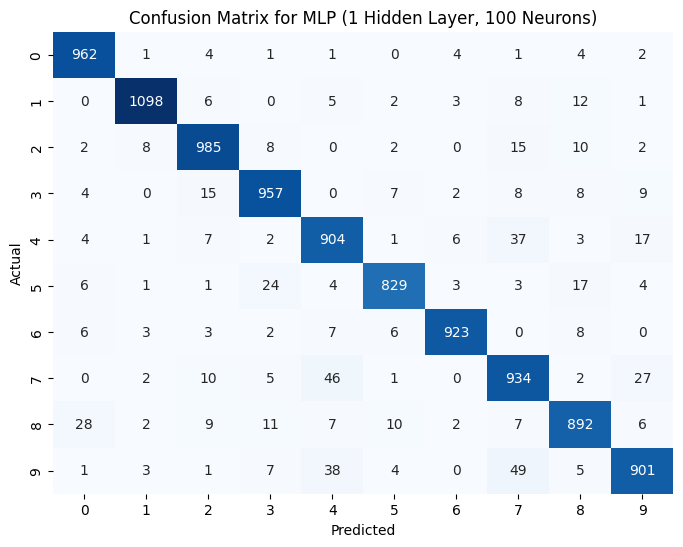

In [9]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for MLP (1 Hidden Layer, 100 Neurons)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()